In [178]:
import sklearn
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [179]:
df=pd.read_csv('QualityPrediction.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [181]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Box plot of Quality Vs residual sugar')

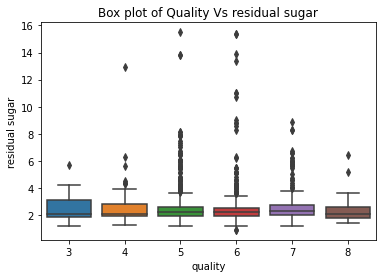

In [182]:
    #plotting quality vs residual sugar to test their correlation
    sns.boxplot(df['quality'],df['residual sugar'])
    plt.title("Box plot of Quality Vs residual sugar")

Text(0.5, 1.0, 'Box plot of Quality Vs fixed acidity')

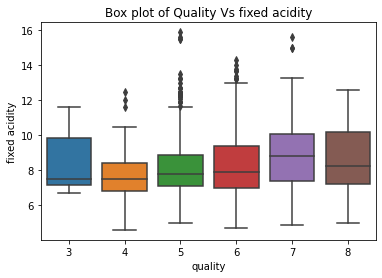

In [183]:
    #plotting quality vs fixed acidity to test their correlation
    sns.boxplot(df['quality'],df['fixed acidity'])
    plt.title("Box plot of Quality Vs fixed acidity")

In [184]:
#dropping residual sugar and fixed acidity features
new_df=df.drop('residual sugar',axis=1)
new_df=new_df.drop('fixed acidity',axis=1)
new_df

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [185]:
#splitting data
X_train,x_test,Y_train,y_test=train_test_split(new_df.drop('quality',axis=1),new_df['quality'],test_size=1/4,random_state=0)

In [186]:
#instantiating the model
fit_rf = RandomForestClassifier(random_state=0)
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=0)>

In [232]:
np.random.seed(0)
# Providing the different values of hyperparameters
param_dist = {'max_depth': [1,2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X_train, Y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [199]:
#fitting the best parameters to the model
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=920,
                       random_state=0)

In [200]:
#Finding the best number of trees for the least obb error
fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)     
    fit_rf.fit(X_train,Y_train)     

    oob_error = 1 - fit_rf.oob_score_     
    error_rate[i] = oob_error

In [201]:
oob_series = pd.Series(error_rate)
oob_series

15      0.413678
16      0.412844
17      0.407840
18      0.408674
19      0.402002
          ...   
996     0.402836
997     0.402836
998     0.402836
999     0.402836
1000    0.402002
Length: 986, dtype: float64

In [188]:
list_oob_series
#the error rate changed after re-execution of the program
#error rate on first execution gave an accuracy of 70%

15      0.378649
16      0.376147
17      0.375313
18      0.375313
19      0.369475
          ...   
996     0.333611
997     0.333611
998     0.333611
999     0.333611
1000    0.333611
Length: 986, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

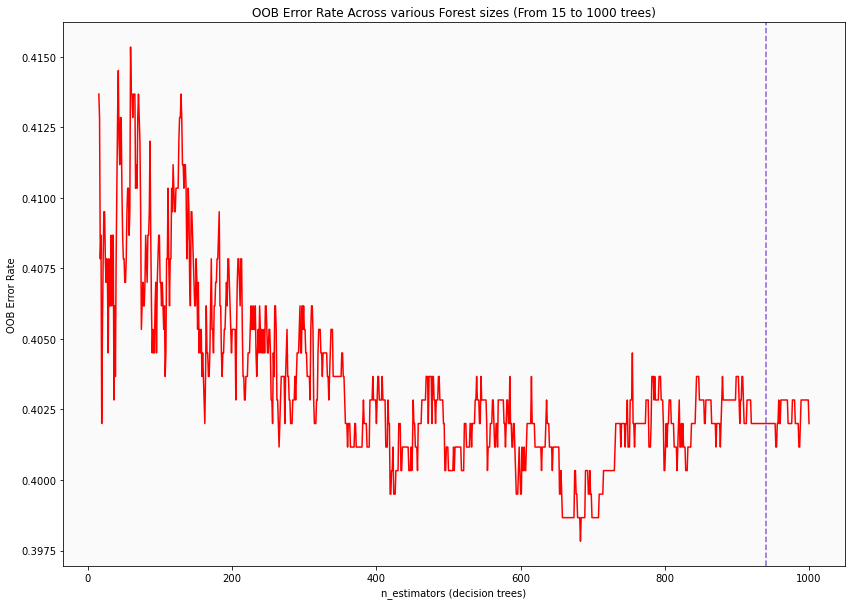

In [223]:
#plotting obb vs number of decision trees
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('#fafafa')

oob_series[:].plot(kind='line',color = 'red')
# plt.axhline(0.3295, color='#875FDB',linestyle='--')
# plt.axhline(0.3294, color='#875FDB',linestyle='--')
plt.axvline(940, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

In [231]:
print('OOB Error rate for 940 trees is: {0:.5f}'.format(oob_series[940]))

OOB Error rate for 940 trees is: 0.40200


In [233]:
#fitting the best parameters to the model
fit_rf.set_params(n_estimators=940,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=940,
                       random_state=0)

In [235]:
#fitting the model with the training data
fit_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=940,
                       random_state=0)

In [236]:
#predicting the output
predictions_rf = fit_rf.predict(x_test)

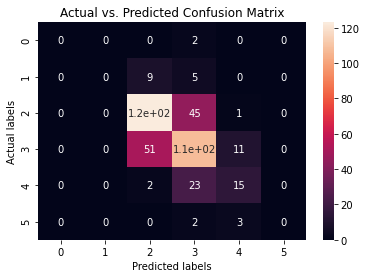

In [237]:
#plotting the confusion matrix
cm=confusion_matrix(y_test,predictions_rf)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix');

plt.show()

In [238]:
#generating the classification report to find accuracy and precision
from sklearn import metrics
print(metrics.classification_report(y_test,predictions_rf))
print('Accuracy: ', metrics.accuracy_score(y_test,predictions_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.66      0.73      0.69       169
           6       0.58      0.64      0.61       170
           7       0.50      0.38      0.43        40
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.58      0.61      0.60       400

Accuracy:  0.615


In [239]:
#evaluating the model
y_pred_proba=fit_rf.predict_proba(x_test)
roc_auc_score(y_test,y_pred_proba,multi_class='ovo',average='weighted')

0.7551060756551141